# 09-05 글로브(GloVe)

글로브(Global Vectors for Word Representation, GloVe)는 카운트 기반과 예측 기반을 모두 사용하는 방법론으로 실제로도 Word2Vec만큼 뛰어난 성능을 보여줍니다. 현재까지의 연구에 따르면 단정적으로 Word2Vec와 GloVe 중에서 어떤 것이 더 뛰어나다고 말할 수는 없고, 이 두 가지 전부를 사용해보고 성능이 더 좋은 것을 사용하는 것이 바람직합니다.

## 기존 방법론에 대한 비판

LSA: DTM이나 TF-IDF 행렬과 같이 각 문서에서의 각 단어의 빈도수를 카운트 한 행렬이라는 전체적인 통계 정보를 입력으로 받아 차원을 축소(Truncated SVD)하여 잠재된 의미를 끌어내는 방법론  
Word2Vec: 실제값과 예측값에 대한 오차를 손실 함수를 통해 줄여나가며 학습하는 예측 기반의 방법론

LSA: 카운트 기반으로 코퍼스의 전체적인 통계 정보를 고려하기는 하지만, 단어 의미의 유추 작업(Analogy task)에는 성능이 떨어짐  
Word2Vec: 예측 기반으로 단어 간 유추 작업에는 LSA보다 뛰어나지만, 임베딩 벡터가 윈도우 크기 내에서만 주변 단어를 고려하기 때문에 코퍼스의 전체적인 통계 정보를 반영하지 못함  
GloVe:  LSA의 메커니즘이었던 카운트 기반의 방법과 Word2Vec의 메커니즘이었던 예측 기반의 방법론 두 가지를 모두 사용

## 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)

동시 등장 행렬: 행과 열을 전체 단어 집합의 단어들로 구성하고, i 단어의 윈도우 크기(Window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬. 행렬을 전치(Transpose)해도 동일한 행렬이 된다는 특징이 있습니다.  
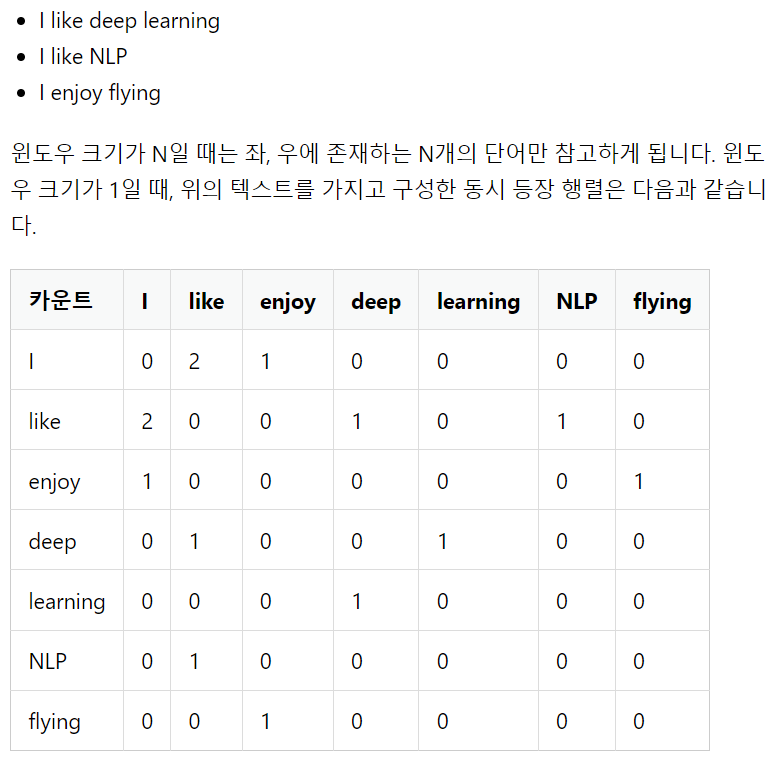

## 동시 등장 확률(Co-occurrence Probability)

동시 등장 확률: 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률  
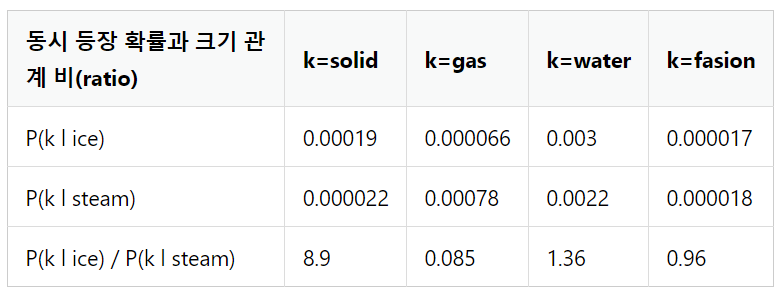


## 손실 함수(Loss function)

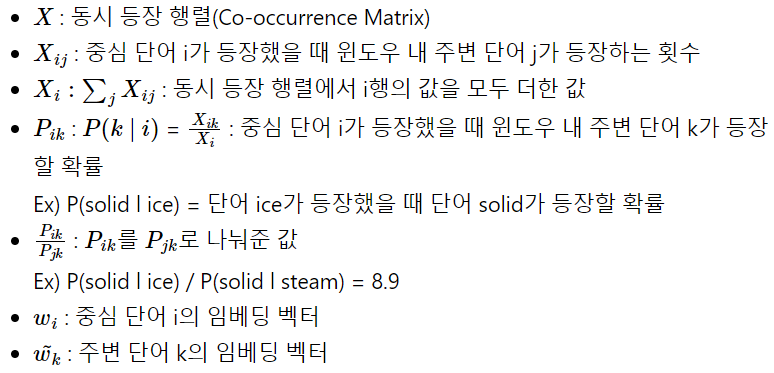  
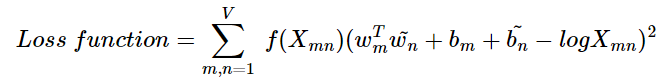

## GloVe 훈련시키기

In [8]:
from glove import Corpus, Glove

corpus = Corpus() 

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(result, window=5)
glove = Glove(no_components=100, learning_rate=0.05)

# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

ImportError: cannot import name 'Corpus' from 'glove' (c:\Users\82105\anaconda3\lib\site-packages\glove\__init__.py)

In [ ]:
print(glove.most_similar("man"))